In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold

sns.set(style='white', context='notebook', palette='deep')

In [22]:
train_df = pd.read_csv('features.dat', header=None)
label_df = pd.read_csv('labels.dat', header=None)

In [23]:
# Cross validate model with Kfold stratified cross val,分层交叉验证
kfold = KFold(n_splits=5)

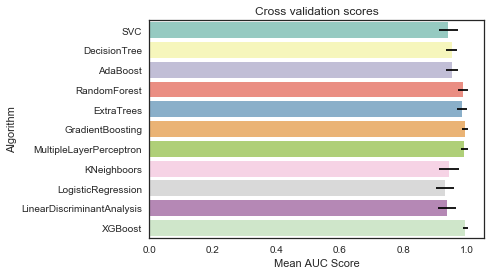

In [24]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state,objective='binary:logistic'))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X = train_df, y = label_df, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean AUC Score")
g = g.set_title("Cross validation scores")

In [25]:
cv_res

,Algorithm,CrossValMeans,CrossValerrors
0,SVC,0.940864,0.030813
1,DecisionTree,0.950966,0.018697
2,AdaBoost,0.952379,0.018301
3,RandomForest,0.987102,0.016014
4,ExtraTrees,0.983038,0.016089
5,GradientBoosting,0.993708,0.009182
6,MultipleLayerPerceptron,0.990935,0.011378
7,KNeighboors,0.943893,0.030824
8,LogisticRegression,0.930405,0.027292
9,LinearDiscriminantAnalysis,0.935508,0.028223
